# The devolpment in the supply balance and turning point analysis for GDP

In [16]:
#use install in needed:
#!pip install matplotlib-venn >nul 2>&1  

## 1. Imports and sets magics:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

## 2. Setting up API to import data from Danmarks Statistik:

We are setting up our API that will allow us to retrieve data from Danmarks Statistik. This we are doing by using someone else work:

In [5]:
# installing API reader, that will allow to load data from DST.
%pip install git+https://github.com/alemartinello/dstapi >nul 2>&1'
%pip install pandas-datareader >nul 2>&1'

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 3. Retrieving and exploring datasets

Now we have set up an API that makes it possible to retrieve data from the different datasets on Danmarks Statistiks website. In order to be able to make our analysis on the supply balance development and a turning point analysis on GDP, we retrieve two datasets. First we retrieve the dataset NAN1 that includes data on all the components of the supply balance. Then we make a summary of the data we retrieved to check what the dataset includes and that we have retrieved it correctly.

In [6]:
forsyningsbalanen = DstApi('NAN1')
tabsum = forsyningsbalanen.tablesummary(language = 'en')
#display(tabsum)
#for variable in tabsum['variable name']:
    #print(variable+':')
    #display(forsyningsbalanen.variable_levels(variable, language='en'))

Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2024-03-27T08:00:00


In order to be able to make our turning point analysis on GDP we retrieve the dataset NKN1. Then we make a summary of the data we retrieved to check what the dataset includes and that we have retrieved it correctly.

In [7]:
kvartal_bnp = DstApi('NKN1')
tabsum2 = kvartal_bnp.tablesummary(language = 'en')
#display(tabsum2)
#for variable in tabsum['variable name']:
    #print(variable+':')
    #display(kvartal_bnp.variable_levels(variable, language='en'))

Table NKN1: Demand and supply by transaction, price unit, seasonal adjustment and time
Last update: 2024-05-21T08:00:00


## 4. Selecting data

We select our specific data that we later use in our analysis/graphs. The functions for choosing the specific data is defined in our .py file. For supply balance components we look at GDP, Import, Export and private consumption. We select data from 1990 and onwards and in chained values (2010-prices).

In [8]:
#Supply balance BNP
print('GDP for the first 5 year of the data periode')
print(dataproject.supply_balance_BNP()[0:5])

GDP for the first 5 year of the data periode
       TID INDHOLD
8568  1990  1288.6
745   1991  1306.6
7080  1992  1332.2
5581  1993  1332.3
9487  1994  1403.3


In [9]:
#Supply balance import
print('Import for the first 5 year of the data periode')
print(dataproject.supply_balance_import()[0:5])

Import for the first 5 year of the data periode
        TID INDHOLD
4801   1966   112.2
8904   1967   120.0
10381  1968   127.7
3310   1969   144.0
4987   1970   157.2


In [10]:
#Supply balance export
print('export for the first 5 year of the data periode')
print(dataproject.supply_balance_export()[0:5])

export for the first 5 year of the data periode
        TID INDHOLD
4783   1966   123.6
8886   1967   128.2
10363  1968   140.7
3292   1969   149.2
4969   1970   154.9


In [11]:
#Supply balance privat
print('Privat consumption for the first 5 year of the data periode')
print(dataproject.supply_balance_privat()[0:5])

Privat consumption for the first 5 year of the data periode
       TID INDHOLD
8592  1990   620.4
769   1991   630.5
7104  1992   646.7
5605  1993   641.1
9511  1994   683.8


In the same way as the supply balance we choose data for a turning point analysis. Here we choose quarterly GDP from 1990 untill 2023 3. quarter in chained values and seasonally adjusted.

In [12]:
#Quarterly BNP, seasonally adjusted
print('Adjusted/smoothed GDP for the first 5 quarters of the data periode (not including blanc entries)')
print(dataproject.quarterly_BNP()[4:9])

Adjusted/smoothed GDP for the first 5 quarters of the data periode (not including blanc entries)
          TID INDHOLD
3470   1991Q1   326.6
20897  1991Q2   325.4
49528  1991Q3   329.5
23361  1991Q4   325.2
45682  1992Q1   331.1


## 5. Analysis

### Figure 1

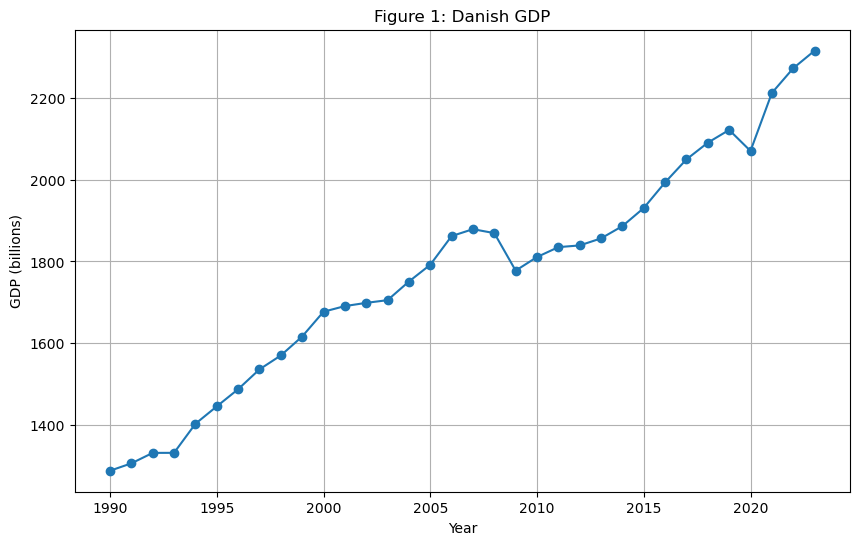

In [13]:
from dataproject import supply_balance_BNP  # Importing the function

# Call the function to get the data
df = supply_balance_BNP()

# Convert 'INDHOLD' to numeric, replacing '..' with NaN
df['INDHOLD'] = pd.to_numeric(df['INDHOLD'], errors='coerce')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['TID'], df['INDHOLD'], marker='o', linestyle='-')
plt.title('Figure 1: Danish GDP')
plt.xlabel('Year')
plt.ylabel('GDP (billions)')

plt.grid(True)
plt.show()

On figure 1 we can see GDP for Denmark in 2010-chained values through the years from 1990 to 2024. In this period GDP for Denmark has increase from 1288.6 to 2315.2 which is almost a 100 pct. increase which is really impressive for Denmark and the people who live there. Notably, we can clearly see the dives from the financial crisis in 2008 and 2009 which was an international recession which also impacted Denmark especially through export. Also note the dive in 2020 which saw a more temporary dive of GDP unlike the financial crisis which was more long lasting. 

### Figure 2

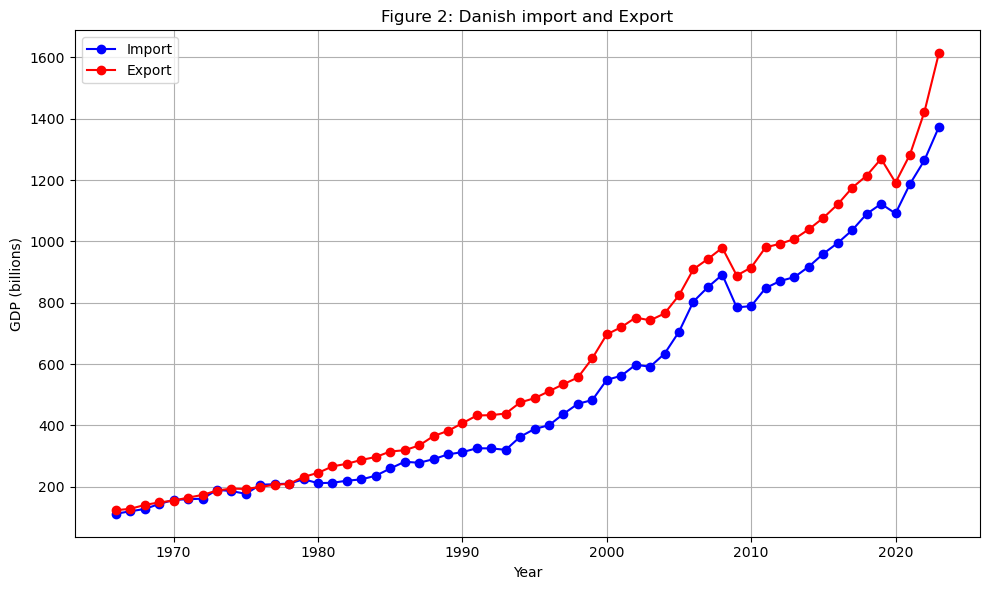

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from dataproject import supply_balance_import, supply_balance_export  # Importing the functions

# Call the functions to get the data
df1 = supply_balance_import()
df2 = supply_balance_export()

# Convert 'INDHOLD' to numeric, replacing '..' with NaN
df1['INDHOLD'] = pd.to_numeric(df1['INDHOLD'], errors='coerce')
df2['INDHOLD'] = pd.to_numeric(df2['INDHOLD'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))

# Plotting both datasets in the same diagram
plt.plot(df1['TID'], df1['INDHOLD'], marker='o', linestyle='-', color='blue', label='Import')
plt.plot(df2['TID'], df2['INDHOLD'], marker='o', linestyle='-', color='red', label='Export')

plt.title('Figure 2: Danish import and Export')
plt.xlabel('Year')
plt.ylabel('GDP (billions)')
plt.grid(True)
plt.legend()  # Show legend with labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In figure 2 we see import and export in 2010-chained prices from 1966 to 2024. We can clearly see that there has been a positive growth thorughout the periosd with dips in 2008-2010 because of the financial crisis and a dip in 2020 for corona crisis. Note that export has been bigger than import for Denmark since the 1980 and we have had fixed exchange rate system since 1982 which cannot be a coincidence. Evidence points to that our currency is too "weak" in the long term since export should be equal to import in the long run. 

### Figure 3


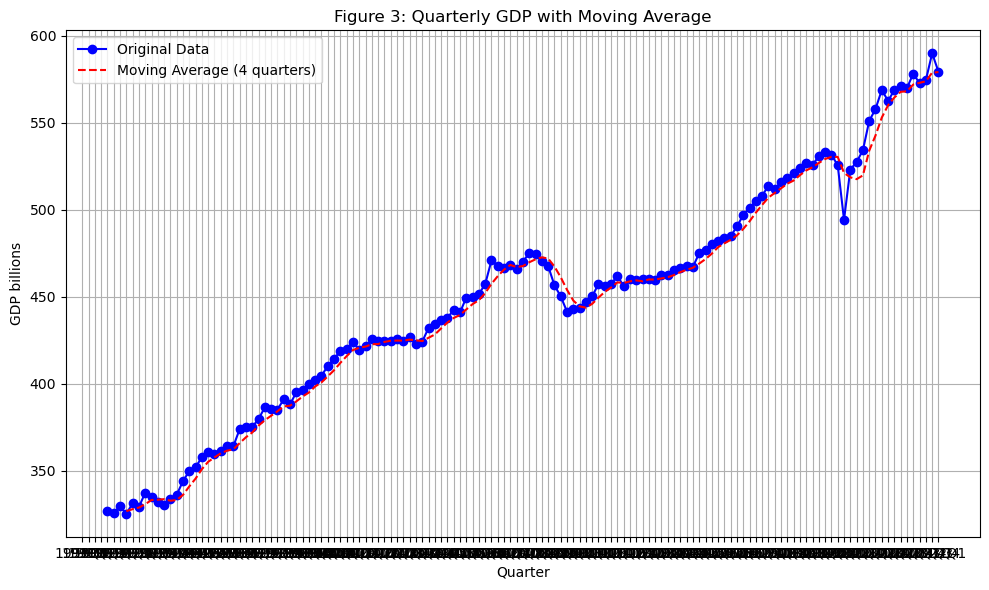

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import dataproject  # Importing the module

moving_avg_len = 4

# Call the function to get the data
Q_BNP_rollingavg = dataproject.quarterly_BNP_for_mov_avg()

# Convert 'INDHOLD' column to numeric
Q_BNP_rollingavg['INDHOLD'] = pd.to_numeric(Q_BNP_rollingavg['INDHOLD'], errors='coerce')

# Calculate the rolling mean
moving_avg = Q_BNP_rollingavg['INDHOLD'].rolling(window=moving_avg_len).mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(Q_BNP_rollingavg['TID'], Q_BNP_rollingavg['INDHOLD'], marker='o', linestyle='-', color='blue', label='Original Data')

# Plot moving average
plt.plot(Q_BNP_rollingavg['TID'], moving_avg, linestyle='--', color='red', label=f'Moving Average ({moving_avg_len} quarters)')

plt.title('Figure 3: Quarterly GDP with Moving Average')
plt.xlabel('Quarter')
plt.ylabel('GDP billions')
plt.grid(True)
plt.legend()  # Show legend with labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In figure 3 can see GDP quarterly from 1990 to 2024 in 2010-chained prices. The red line is the moving average and the blue dots are the quarterly seasonally-adjusted.

# Conclusion

For all three figures we can see an increase in GDP, import and export for Denmark from the years 1966 to 2024 and 1990 to 2024. Noticebly, there is a ig drop in GDP, export and import in 2008 which is caused by the financial crisis. There is also a big drop in those same variables in 2020 which is caused by the corona pandemic.  